In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub

## Read data

In [ ]:
path = kagglehub.dataset_download("abhayayare/employee-data-simulation-it-industry")

In [ ]:
salaries = pd.read_csv(path + "/employee_data.csv")

In [ ]:
salaries

## Data checkups

In [ ]:
salaries.isna().sum()

,0
ID,0
Gender,0
Experience (Years),0
Position,0
Salary,0


In [ ]:
salaries.Gender.value_counts()

,count
Gender,
M,202
F,198


In [ ]:
salaries.Position.value_counts()

,count
Position,
Web Developer,43
IT Manager,40
IT Security Analyst,39
Systems Administrator,38
Database Administrator (DBA),38
DevOps Engineer,37
Systems Analyst,37
Software Engineer,36
Network Administrator,31


In [ ]:
salaries.groupby(['Gender'])['Position'].value_counts()

Gender  Position                    
F       Systems Analyst                 22
        Web Developer                   22
        IT Manager                      20
        Software Engineer               18
        Systems Administrator           18
        Cloud Solutions Architect       17
        DevOps Engineer                 17
        IT Security Analyst             17
        IT Support Specialist           17
        Database Administrator (DBA)    16
        Network Administrator           14
M       Database Administrator (DBA)    22
        IT Security Analyst             22
        Web Developer                   21
        DevOps Engineer                 20
        IT Manager                      20
        Systems Administrator           20
        Software Engineer               18
        Network Administrator           17
        Systems Analyst                 15
        IT Support Specialist           14
        Cloud Solutions Architect       13
Name: count, dtype: int64

In [ ]:
salaries.groupby(['Position'])['Salary'].mean()

,Salary
Position,
Cloud Solutions Architect,160841.633333
Database Administrator (DBA),132864.552632
DevOps Engineer,161859.081081
IT Manager,170711.550000
IT Security Analyst,134440.820513
IT Support Specialist,87683.806452
Network Administrator,116865.064516
Software Engineer,131357.416667
Systems Administrator,113117.447368


## Encode categories

In [ ]:
salaries.Gender = salaries.Gender.map({'F':1, 'M': 2})

In [ ]:
salaries.drop(columns=["ID"], inplace=True)

In [ ]:
salaries

,Gender,Experience (Years),Position,Salary
0,1,4,DevOps Engineer,109976
1,2,6,DevOps Engineer,120088
2,2,17,Web Developer,181301
3,2,7,Systems Administrator,77530
4,1,13,Systems Administrator,152397
...,...,...,...,...
395,1,19,Cloud Solutions Architect,236045
396,1,20,Web Developer,182770
397,1,9,Network Administrator,85550
398,2,18,Database Administrator (DBA),129996


In [ ]:
freq_encoding = (
    salaries.groupby(["Position", "Experience (Years)"])
    .size()  # Numărul de apariții pentru fiecare combinație
    .div(len(salaries))  # Împarte la numărul total de rânduri pentru a obține frecvența
    .reset_index(name="Frequency")
)

In [ ]:
freq_dict = freq_encoding.set_index(["Position", "Experience (Years)"])["Frequency"].to_dict() ## Creez un dictionar pentru encodarea setului de test

In [ ]:
salaries["Experience_Position_Encoded"] = salaries[["Position", "Experience (Years)"]].apply(
    lambda x: freq_dict.get((x["Position"], x["Experience (Years)"]), 0), axis=1
)

In [ ]:
salaries

,Gender,Experience (Years),Position,Salary,Experience_Position_Encoded
0,1,4,DevOps Engineer,109976,0.0025
1,2,6,DevOps Engineer,120088,0.0050
2,2,17,Web Developer,181301,0.0025
3,2,7,Systems Administrator,77530,0.0025
4,1,13,Systems Administrator,152397,0.0075
...,...,...,...,...,...
395,1,19,Cloud Solutions Architect,236045,0.0075
396,1,20,Web Developer,182770,0.0025
397,1,9,Network Administrator,85550,0.0100
398,2,18,Database Administrator (DBA),129996,0.0050


In [ ]:
salaries.drop(columns=["Position"], inplace=True)

In [ ]:
salaries

,Gender,Experience (Years),Salary,Experience_Position_Encoded
0,1,4,109976,0.0025
1,2,6,120088,0.0050
2,2,17,181301,0.0025
3,2,7,77530,0.0025
4,1,13,152397,0.0075
...,...,...,...,...
395,1,19,236045,0.0075
396,1,20,182770,0.0025
397,1,9,85550,0.0100
398,2,18,129996,0.0050


## Correlation

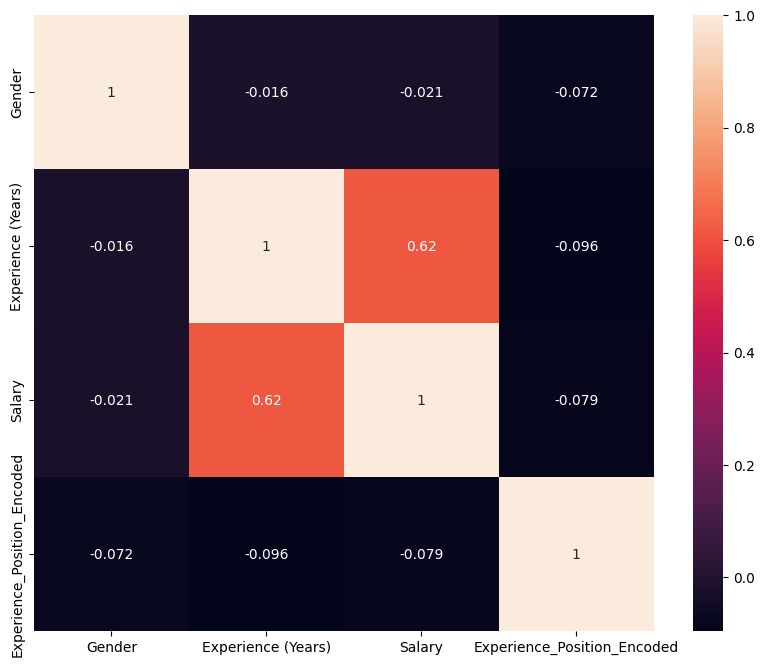

In [ ]:
corr_matrix = salaries.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Data Splitting

In [ ]:
X = salaries.drop(columns=['Salary'])
y = salaries['Salary']

In [ ]:
X

,Gender,Experience (Years),Experience_Position_Encoded
0,1,4,0.0025
1,2,6,0.0050
2,2,17,0.0025
3,2,7,0.0025
4,1,13,0.0075
...,...,...,...
395,1,19,0.0075
396,1,20,0.0025
397,1,9,0.0100
398,2,18,0.0050


In [ ]:
y

,Salary
0,109976
1,120088
2,181301
3,77530
4,152397
...,...
395,236045
396,182770
397,85550
398,129996


In [ ]:
from sklearn.model_selection import train_test_split
## Impartim in set de antrenare si set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
y_train_scaled

array([[-1.24195687],
       [-0.04875516],
       [ 0.44713646],
       [-0.25192849],
       [-0.3404113 ],
       [ 0.58159246],
       [-0.75049862],
       [-0.23144722],
       [-0.52511222],
       [-1.70291256],
       [-0.79446293],
       [ 0.0101718 ],
       [ 1.22362387],
       [-0.72251293],
       [ 0.01229613],
       [ 0.44993042],
       [-0.33135982],
       [-0.47636817],
       [-0.91984436],
       [ 0.23798269],
       [ 0.61685166],
       [ 0.36837476],
       [-0.46551564],
       [ 1.26818854],
       [ 0.32819729],
       [-0.45771105],
       [-1.08466437],
       [-0.94071818],
       [ 0.84099116],
       [-0.86583568],
       [-0.64920058],
       [-0.63913312],
       [ 0.00493026],
       [-0.66783462],
       [ 0.17741631],
       [-0.6034583 ],
       [-1.25285558],
       [ 1.13015352],
       [ 0.12892625],
       [-1.19806182],
       [-1.4234944 ],
       [-0.18348824],
       [ 1.32457555],
       [ 2.57464916],
       [-1.38786575],
       [-0

## Testing

In [ ]:
## Ridge
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train_scaled)

Ridge(alpha=0.1)

In [ ]:
preds = ridge_model.predict(X_test)

In [ ]:
preds

array([[ 0.14040827],
       [-0.4551637 ],
       [-0.65361785],
       [-0.58080519],
       [ 0.63680556],
       [-0.48163051],
       [ 0.73608502],
       [-0.18368736],
       [-0.68018942],
       [-0.45505893],
       [-0.38224627],
       [ 0.80910722],
       [ 0.01445247],
       [ 0.90828191],
       [-0.65403694],
       [ 0.90828191],
       [-0.97781825],
       [-0.85217676],
       [ 0.43835142],
       [-0.68018942],
       [-0.75310685],
       [ 0.33917673],
       [-0.68029419],
       [-0.85238631],
       [-0.58070042],
       [ 1.00777091],
       [-0.58070042],
       [-0.08461745],
       [ 0.61065308],
       [ 0.61033876],
       [ 0.90828191],
       [-0.25660479],
       [ 0.14040827],
       [ 0.61044353],
       [ 0.90849145],
       [ 0.63691033],
       [ 0.80900245],
       [ 0.73608502],
       [ 0.51116407],
       [-0.45526848],
       [-0.9780278 ],
       [ 1.03402817],
       [ 0.53773565],
       [ 0.01445247],
       [ 0.01487156],
       [ 0

In [ ]:
rescaled_preds = scaler_y.inverse_transform(preds)

In [ ]:
rescaled_preds

array([[137397.26157055],
       [111604.32003567],
       [103009.69784417],
       [106163.05739559],
       [158895.16074977],
       [110458.09975124],
       [163194.74058562],
       [123361.37673897],
       [101858.94007955],
       [111608.85751586],
       [114762.21706728],
       [166357.17509742],
       [131942.38648989],
       [170652.21745308],
       [102991.5479234 ],
       [170652.21745308],
       [ 88969.2755324 ],
       [ 94410.53817248],
       [150300.53855827],
       [101858.94007955],
       [ 98701.04304794],
       [146005.49620262],
       [101854.40259936],
       [ 94401.46321209],
       [106167.59487578],
       [174960.8722493 ],
       [106167.59487578],
       [127651.88161443],
       [157762.55290592],
       [157748.94046535],
       [170652.21745308],
       [120203.47970736],
       [137397.26157055],
       [157753.47794554],
       [170661.29241346],
       [158899.69822996],
       [166352.63761723],
       [163194.74058562],
       [1534

In [ ]:
y_test

,Salary
209,93165
280,91842
33,97240
210,68000
93,128620
...,...
246,177180
227,186294
369,159733
176,77683


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(rescaled_preds, y_test)
r2 = r2_score(y_test, rescaled_preds)

In [ ]:
print("R2 score: ", r2)
print("MSE score: ", mse)

R2 score:  0.447425607283669
MSE score:  1032228448.5154518


In [ ]:
## Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train_scaled)
preds_lasso = lasso_model.predict(X_test)

In [ ]:
preds_lasso

array([ 0.09282927, -0.34082571, -0.48537737, -0.41310154,  0.45420842,
       -0.34082571,  0.52648425, -0.12399822, -0.48537737, -0.34082571,
       -0.26854988,  0.59876008,  0.02055344,  0.67103591, -0.48537737,
        0.67103591, -0.70220487, -0.62992904,  0.30965676, -0.48537737,
       -0.55765321,  0.23738093, -0.48537737, -0.62992904, -0.41310154,
        0.74331175, -0.41310154, -0.05172239,  0.45420842,  0.45420842,
        0.67103591, -0.19627405,  0.09282927,  0.45420842,  0.67103591,
        0.45420842,  0.59876008,  0.52648425,  0.38193259, -0.34082571,
       -0.70220487,  0.74331175,  0.38193259,  0.02055344,  0.02055344,
        0.02055344,  0.67103591,  0.1651051 , -0.70220487,  0.30965676,
       -0.62992904,  0.59876008, -0.41310154,  0.67103591,  0.23738093,
       -0.41310154, -0.12399822, -0.05172239, -0.12399822,  0.23738093,
        0.02055344, -0.19627405, -0.62992904,  0.1651051 , -0.62992904,
       -0.19627405,  0.1651051 , -0.05172239, -0.48537737, -0.62

In [ ]:
rescaled_preds_lasso = scaler_y.inverse_transform([preds_lasso])

In [ ]:
rescaled_preds_lasso

array([[136824.37873824, 111094.05470559, 102517.28002804,
        106805.66736681, 158266.31543211, 111094.05470559,
        162554.70277089, 123959.21672191, 102517.28002804,
        111094.05470559, 115382.44204436, 166843.09010966,
        132535.99139946, 171131.47744844, 102517.28002804,
        171131.47744844,  89652.11801171,  93940.50535049,
        149689.54075456, 102517.28002804,  98228.89268926,
        145401.15341579, 102517.28002804,  93940.50535049,
        106805.66736681, 175419.86478722, 106805.66736681,
        128247.60406069, 158266.31543211, 158266.31543211,
        171131.47744844, 119670.82938314, 136824.37873824,
        158266.31543211, 171131.47744844, 158266.31543211,
        166843.09010966, 162554.70277089, 153977.92809334,
        111094.05470559,  89652.11801171, 175419.86478722,
        153977.92809334, 132535.99139946, 132535.99139946,
        132535.99139946, 171131.47744844, 141112.76607701,
         89652.11801171, 149689.54075456,  93940.5053504

In [ ]:
mse = mean_squared_error(rescaled_preds_lasso.reshape(-1, 1), y_test)
r2 = r2_score(y_test, rescaled_preds_lasso.reshape(-1, 1))
print("R2 score: ", r2)
print("MSE score: ", mse)

R2 score:  0.45046521494468117
MSE score:  1026550354.2328002


Epoch 1/200, Cost: 1.3743
Epoch 2/200, Cost: 1.3074
Epoch 3/200, Cost: 1.2444
Epoch 4/200, Cost: 1.1856
Epoch 5/200, Cost: 1.1315
Epoch 6/200, Cost: 1.0823
Epoch 7/200, Cost: 1.0379
Epoch 8/200, Cost: 0.9899
Epoch 9/200, Cost: 0.9478
Epoch 10/200, Cost: 0.9092
Epoch 11/200, Cost: 0.8740
Epoch 12/200, Cost: 0.8429
Epoch 13/200, Cost: 0.8084
Epoch 14/200, Cost: 0.7792
Epoch 15/200, Cost: 0.7572
Epoch 16/200, Cost: 0.7276
Epoch 17/200, Cost: 0.7028
Epoch 18/200, Cost: 0.6810
Epoch 19/200, Cost: 0.6603
Epoch 20/200, Cost: 0.6408
Epoch 21/200, Cost: 0.6247
Epoch 22/200, Cost: 0.6067
Epoch 23/200, Cost: 0.5904
Epoch 24/200, Cost: 0.5755
Epoch 25/200, Cost: 0.5628
Epoch 26/200, Cost: 0.5509
Epoch 27/200, Cost: 0.5387
Epoch 28/200, Cost: 0.5291
Epoch 29/200, Cost: 0.5158
Epoch 30/200, Cost: 0.5059
Epoch 31/200, Cost: 0.4969
Epoch 32/200, Cost: 0.4895
Epoch 33/200, Cost: 0.4811
Epoch 34/200, Cost: 0.4736
Epoch 35/200, Cost: 0.4670
Epoch 36/200, Cost: 0.4598
Epoch 37/200, Cost: 0.4547
Epoch 38/2

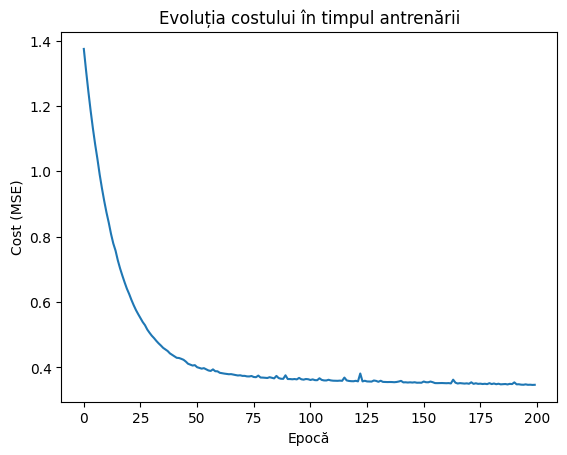

Mean Squared Error pe setul de test: 1037398255.4961
R2 pe setul de test: 0.4447


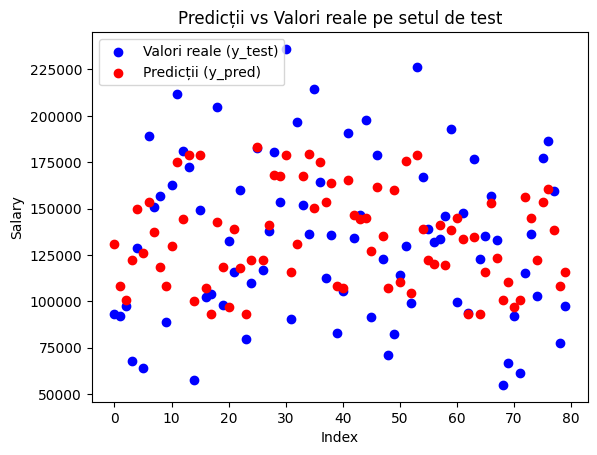

In [ ]:
## Mini-Batch Gradient-Descent
# Adăugăm o coloană de 1 pentru bias
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Parametrii inițiali
theta = np.random.randn(X_train_b.shape[1], 1)  # Theta pentru features + bias
learning_rate = 0.0002
n_epochs = 200
batch_size = 4  # Mini-batch de dimensiune 8

# Funcția de calcul al costului (MSE)
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X_b, y, theta, learning_rate, n_epochs, batch_size):
    m = len(y)
    cost_history = []  # Pentru a înregistra costul în fiecare epocă

    for epoch in range(n_epochs):
        # Amestecă setul de date la fiecare epocă pentru a îmbunătăți generalizarea
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            # Selectăm un mini-batch
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Calculăm predicțiile și gradientul
            gradients = (2 / batch_size) * xi.T.dot(xi.dot(theta) - yi)

            # Actualizăm parametrii (theta)
            theta = theta - learning_rate * gradients

        # Înregistrăm costul după fiecare epocă
        cost = compute_cost(X_b, y, theta)
        cost_history.append(cost)

        print(f"Epoch {epoch + 1}/{n_epochs}, Cost: {cost:.4f}")

    return theta, cost_history

# Antrenarea modelului pe X_train și y_train
theta_final, cost_history = mini_batch_gradient_descent(X_train_b, y_train_scaled, theta, learning_rate, n_epochs, batch_size)

# Afișarea rezultatului
print("Theta estimat (parametri finali):", theta_final)

# Vizualizarea funcției cost
plt.plot(range(len(cost_history)), cost_history)
plt.title("Evoluția costului în timpul antrenării")
plt.xlabel("Epocă")
plt.ylabel("Cost (MSE)")
plt.show()

# Testarea pe setul de test
y_pred = X_test_b.dot(theta_final)
rescaled_ypred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
# Calcularea MSE pe setul de test
mse_test = mean_squared_error(rescaled_ypred, y_test)
print(f"Mean Squared Error pe setul de test: {mse_test:.4f}")
r2_test = r2_score(y_test, rescaled_ypred)
print(f"R2 pe setul de test: {r2_test:.4f}")

# Vizualizarea predicțiilor
plt.scatter(range(len(y_test)), y_test, color="blue", label="Valori reale (y_test)")
plt.scatter(range(len(rescaled_ypred)), rescaled_ypred, color="red", label="Predicții (y_pred)")
plt.title("Predicții vs Valori reale pe setul de test")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.legend()
plt.show()